In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.io import fits
from scipy.signal import find_peaks
from calibrator import Calibrator

/usr/local/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
def load_calibration_lines(input_file='calibration_lines.csv',
                           elements=["Hg", "Ar", "Xe", "CuNeAr", "Kr"],
                           min_wavelength=100,
                           max_wavelength=1000):
    cal_lines = np.loadtxt(input_file, delimiter=',', dtype='U', skiprows=1)
    wave = cal_lines[:, 0].astype('float')
    element = cal_lines[:, 1]
    # Get lines of the requested elements
    lines = wave[np.isin(element, elements)]
    # Get only lines within the requested wavelength
    mask = (lines > min_wavelength) * (lines < max_wavelength)
    return lines[mask]

In [3]:
atlas = load_calibration_lines(
    "calibration_lines.csv", elements=["Xe"], min_wavelength=300, max_wavelength=900)

spectrum = np.median(fits.open('v_a_20190516_55_1_0_1.fits')[0].data[110:120], axis=0)

peaks, _ = find_peaks(spectrum, distance=10., threshold=10.)

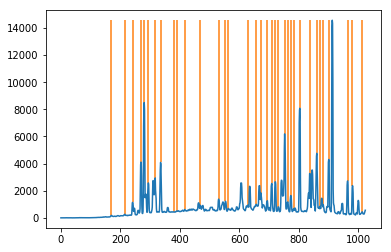

In [4]:
plt.plot(spectrum)
plt.vlines(peaks,
              spectrum[peaks.astype('int')],
              spectrum.max(),
              colors='C1')


[-1.20851153e-12  3.39415436e-09 -3.52706057e-06  1.67116973e-03
  8.23957131e-02  3.71796440e+02]
[ 4.64147438e-13 -1.44266884e-09  1.74205977e-06 -1.01106796e-03
  5.18238600e-01  3.52891019e+02]
[-6.36047028e-13  1.43519185e-09 -1.11337056e-06  3.04699388e-04
  2.42579626e-01  3.73635207e+02]
[ 8.04907348e-13 -2.85609421e-09  3.57653140e-06 -1.98799148e-03
  7.04635746e-01  3.60734828e+02]


No handles with labels found to put in legend.


[ 4.66044483e-13 -1.31925689e-09  1.36699739e-06 -6.08483951e-04
  5.60572145e-01  3.24299078e+02]
Peak at: 419.4353083412854 nm
- matched to 419.35 nm
Peak at: 438.4053583137867 nm
- matched to 438.39 nm
Peak at: 449.81425302193657 nm
- matched to 450.098 nm
Peak at: 462.3037554553782 nm
- matched to 462.428 nm
Peak at: 467.2433937991069 nm
- matched to 467.123 nm
Peak at: 473.5435110265158 nm
- matched to 473.415 nm
Peak at: 483.9012594730344 nm
Peak at: 491.9934914698797 nm
- matched to 491.99 nm
Peak at: 511.640311227445 nm
Peak at: 516.512038666536 nm
- matched to 516.271 nm
Peak at: 527.954494103999 nm
Peak at: 550.5396329588289 nm
Peak at: 577.075246678173 nm
Peak at: 586.8693418777777 nm
Peak at: 591.1276891224488 nm
Peak at: 618.9424473307612 nm
Peak at: 631.5025636899159 nm
- matched to 631.806 nm
Peak at: 638.0518183331521 nm
Peak at: 647.7309789408374 nm
Peak at: 654.3836744047097 nm
Peak at: 659.7378387177845 nm
- matched to 659.556 nm
Peak at: 664.2214262374741 nm
Peak at

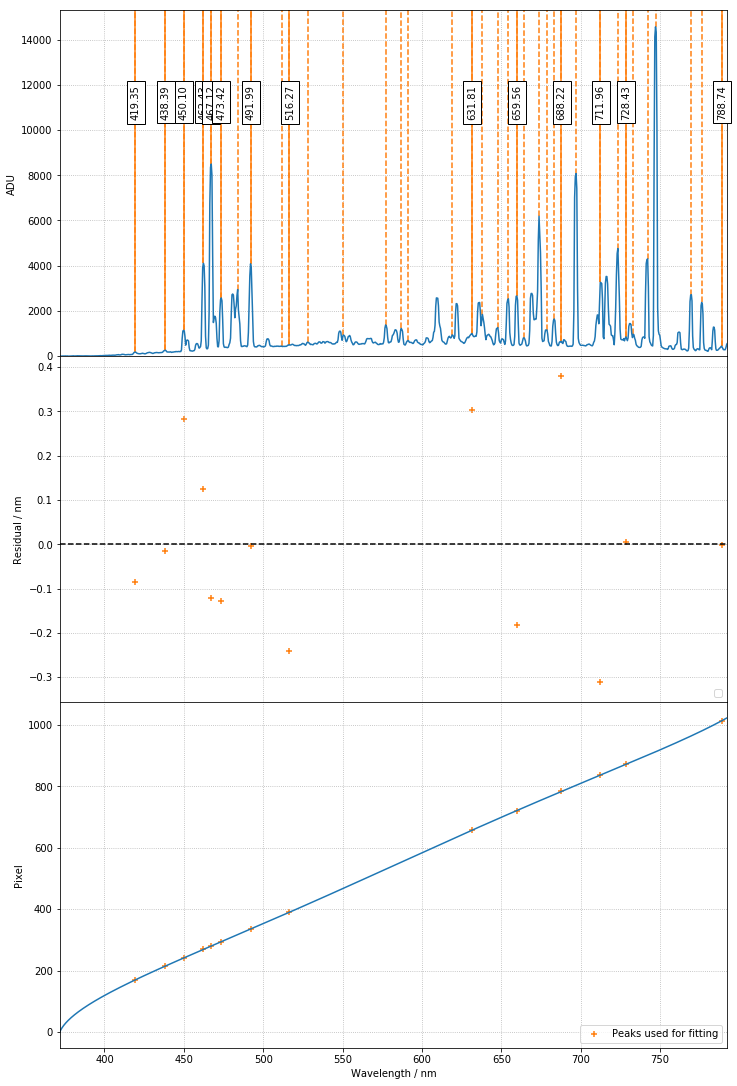

In [5]:
c = Calibrator(peaks, atlas)
c.set_fit_constraints(
    min_slope=0.2,
    max_slope=0.8,
    min_intercept=200.,
    max_intercept=500.,
    fit_tolerance=0.5,
    line_fit_thresh=2,
    thresh=5,
    polydeg=5,
    fittype='poly')

# Providing known pixel-wavelength mapping
#c.set_known_pairs([635.6024, 803.5022], [631.806, 711.96])
best_p = c.fit(mode='fast', progress=False)
c.plot_fit(spectrum, best_p)

[-1.08845728e-12  2.95060569e-09 -2.93084316e-06  1.31679962e-03
  1.71800468e-01  3.64067653e+02]
[ 7.82856350e-13 -1.88317762e-09  1.62982441e-06 -6.11188815e-04
  3.40302154e-01  3.72583114e+02]
[-3.89697692e-13  7.17477991e-10 -3.46951280e-07 -6.42074134e-05
  3.22049383e-01  3.67536037e+02]
[ 1.18743173e-12 -3.59324363e-09  4.05997803e-06 -2.11585012e-03
  7.16217460e-01  3.60707597e+02]
[ 4.04779886e-13 -9.99831233e-10  8.75801715e-07 -3.20234987e-04
  5.01160922e-01  3.28492036e+02]
[ 3.17361326e-12 -7.76077416e-09  6.84025030e-06 -2.61283598e-03
  6.73677458e-01  3.30405177e+02]
[-1.37292376e-15  3.96954698e-11 -1.33457540e-07  1.75936998e-04
  3.74007836e-01  3.51305453e+02]
[ 1.41205950e-12 -4.08722280e-09  4.45031348e-06 -2.26268876e-03
  7.43214674e-01  3.58784806e+02]
[ 3.22173641e-13 -1.32908190e-09  1.96109573e-06 -1.29464106e-03
  7.49987187e-01  3.09356301e+02]


No handles with labels found to put in legend.


[ 1.01756993e-12 -3.42050813e-09  4.14872007e-06 -2.26362347e-03
  7.67459227e-01  3.55330921e+02]
Peak at: 419.3486461017481 nm
- matched to 419.35 nm
Peak at: 438.60766250825026 nm
- matched to 438.39 nm
Peak at: 449.92465568374143 nm
- matched to 450.098 nm
Peak at: 462.252688189229 nm
- matched to 462.428 nm
Peak at: 467.133075061888 nm
- matched to 467.123 nm
Peak at: 473.3731555222475 nm
- matched to 473.415 nm
Peak at: 483.6908294281925 nm
Peak at: 491.8193710005006 nm
- matched to 491.99 nm
Peak at: 511.8690585540847 nm
Peak at: 516.9179023334062 nm
Peak at: 528.9035945478191 nm
Peak at: 553.0691443338403 nm
Peak at: 582.1562986467798 nm
- matched to 582.389 nm
Peak at: 593.0068656102601 nm
- matched to 593.417 nm
Peak at: 597.7329867067671 nm
Peak at: 628.5553394665426 nm
Peak at: 642.3519841069831 nm
Peak at: 649.4963100480795 nm
Peak at: 659.9828418874098 nm
- matched to 659.556 nm
Peak at: 667.1374254496637 nm
- matched to 666.892 nm
Peak at: 672.8633585440774 nm
- matched 

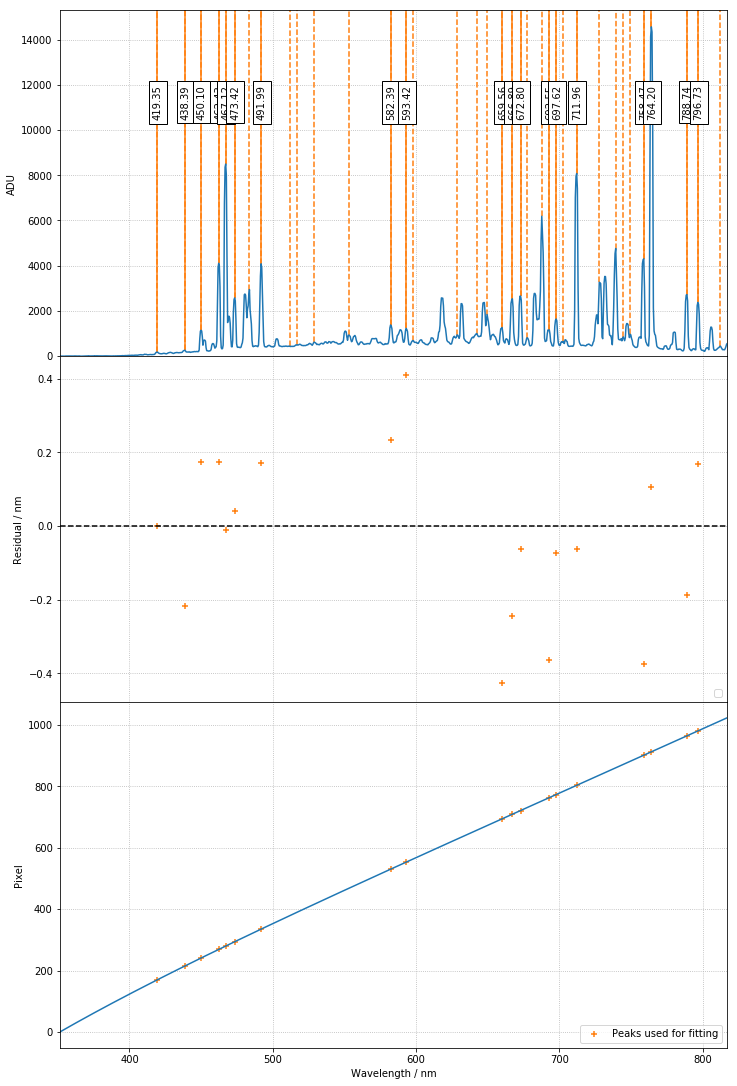

In [6]:
best_p = c.fit(progress=False)
c.plot_fit(spectrum, best_p)

[-1.06788307e-12  2.95240361e-09 -3.00981561e-06  1.39582005e-03
  1.46892957e-01  3.66486909e+02]
[ 1.20973550e-12 -3.59288855e-09  4.06353466e-06 -2.16578472e-03
  7.76925102e-01  3.32720896e+02]
[ 8.43732593e-13 -2.53238355e-09  2.91369632e-06 -1.59299108e-03
  6.49431964e-01  3.42446501e+02]
[ 6.69296908e-13 -2.30834850e-09  2.85386190e-06 -1.50041683e-03
  5.12285235e-01  3.89149746e+02]
[-7.16262370e-13  2.47105096e-09 -3.16508024e-06  1.85118554e-03
 -2.34014660e-02  3.72743197e+02]
[ 2.51156666e-14 -1.20006168e-10  1.38565632e-07 -3.32391092e-05
  2.50086080e-01  3.54561446e+02]
[-1.37292376e-15  3.96954698e-11 -1.33457540e-07  1.75936998e-04
  3.74007836e-01  3.51305453e+02]
[ 1.29732217e-12 -3.80695727e-09  4.20417333e-06 -2.16292963e-03
  7.24411607e-01  3.60102022e+02]
[-1.33196437e-13 -9.73183966e-11  7.46040952e-07 -7.57358496e-04
  6.43182781e-01  3.17017846e+02]


No handles with labels found to put in legend.


[ 1.24463736e-12 -3.56890141e-09  3.90719079e-06 -2.01308134e-03
  6.92254161e-01  3.62518735e+02]
Peak at: 419.3486461017481 nm
- matched to 419.35 nm
Peak at: 438.60766250825026 nm
- matched to 438.39 nm
Peak at: 449.92465568374143 nm
- matched to 450.098 nm
Peak at: 462.252688189229 nm
- matched to 462.428 nm
Peak at: 467.133075061888 nm
- matched to 467.123 nm
Peak at: 473.3731555222475 nm
- matched to 473.415 nm
Peak at: 483.6908294281925 nm
Peak at: 491.8193710005006 nm
- matched to 491.99 nm
Peak at: 511.8690585540847 nm
Peak at: 516.9179023334062 nm
Peak at: 528.9035945478191 nm
Peak at: 553.0691443338403 nm
Peak at: 582.1562986467798 nm
- matched to 582.389 nm
Peak at: 593.0068656102601 nm
- matched to 593.417 nm
Peak at: 597.7329867067671 nm
Peak at: 628.5553394665426 nm
Peak at: 642.3519841069831 nm
Peak at: 649.4963100480795 nm
Peak at: 659.9828418874098 nm
- matched to 659.556 nm
Peak at: 667.1374254496637 nm
- matched to 666.892 nm
Peak at: 672.8633585440774 nm
- matched 

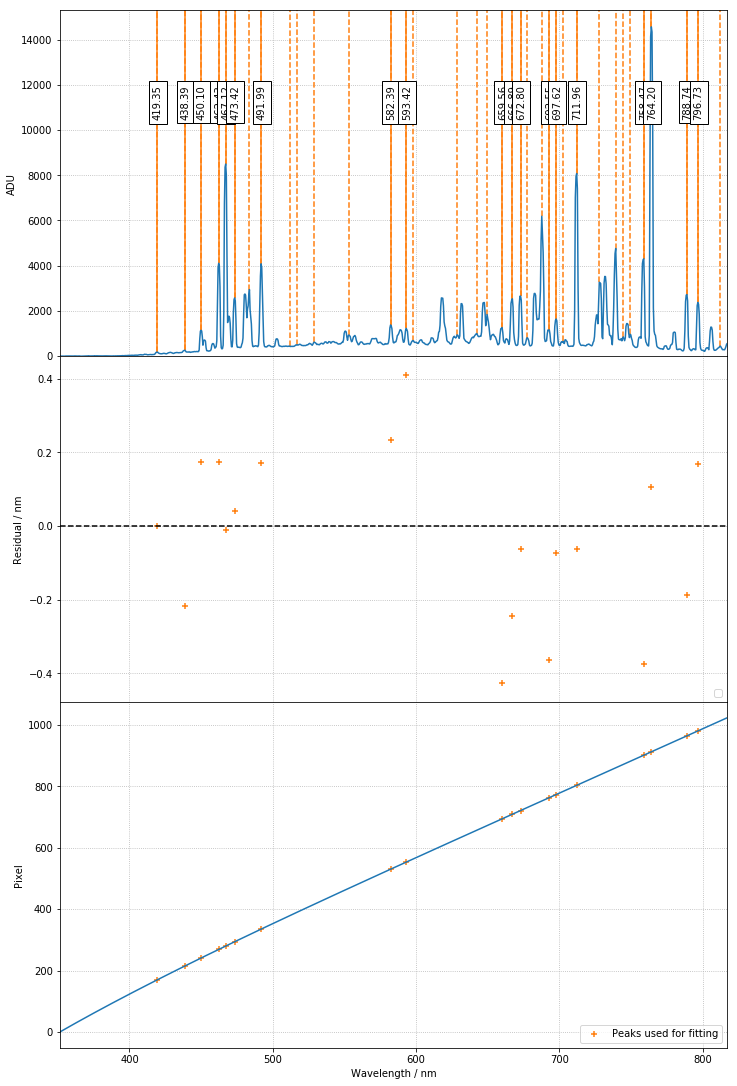

In [7]:
best_p = c.fit(mode='slow', progress=False)
c.plot_fit(spectrum, best_p)